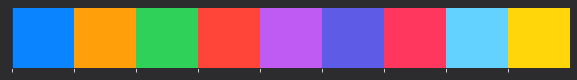

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorboard as tb
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.data import Dataset

%matplotlib inline

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]
raw_darks=[
    (44, 44, 46)
]
raw_lights=[
    (229, 229, 234)
]
miscellaneous={
    'blue':'#0f71d4',
    'green':'#14b827',
    'red':'#cf0c0c'
}

dark_palette=np.array(raw_dark_palette)/255
darks=np.array(raw_darks)/255
lights=np.array(raw_lights)/255

#rcparams
dark_color=darks[-1]
light_color=lights[-1]

mpl.rcParams['axes.prop_cycle']=cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']=dark_color
mpl.rcParams['figure.edgecolor']=dark_color
mpl.rcParams['axes.facecolor']=dark_color
mpl.rcParams['text.color']=light_color
mpl.rcParams['axes.labelcolor']=light_color
mpl.rcParams['axes.edgecolor']=dark_color
mpl.rcParams['xtick.color']=light_color
mpl.rcParams['ytick.color']=light_color
mpl.rcParams['figure.dpi']=80
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

sns.palplot(dark_palette)

In [3]:
train=pd.read_csv('data/train.csv',index_col=[0])
test=pd.read_csv('data/test.csv',index_col=[0])
train['target']=train['target'].str.slice(start=6).astype(int)-1
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,1
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
train,val=train_test_split(train,test_size=0.2)

In [5]:
train_target=train.pop('target')
val_target=val.pop('target')
train=Dataset.from_tensor_slices((train.values,train_target.values))
val=Dataset.from_tensor_slices((val.values,val_target.values))

In [10]:
BATCH_SIZE=32
BUFFER_SIZE=10000
EPOCHS=100

In [7]:
train=train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
val=val.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)

In [2]:
def create_model():
    model=Sequential([
        Dense(256,activation='relu'),
        Dense(256,activation='relu'),
        Dropout(0.15),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dropout(0.15),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dropout(0.15),
        Dense(16,activation='relu'),
        Dense(16,activation='relu'),
        Dense(4,activation='softmax'),
    ])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
    return model

In [19]:
model_checkpoint=ModelCheckpoint('models/model1.h5',save_best_only=True,monitor='val_loss')
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [20]:
model1=create_model()
history=model1.fit(train,validation_data=val,epochs=EPOCHS,batch_size=BATCH_SIZE,callbacks=[model_checkpoint,early_stopping])

Epoch 1/100
2500/2500 [==============================] - 14s 5ms/step - loss: 1.1415 - val_loss: 1.1195
Epoch 2/100
2500/2500 [==============================] - 13s 5ms/step - loss: 1.1209 - val_loss: 1.1189
Epoch 3/100
2500/2500 [==============================] - 13s 5ms/step - loss: 1.1130 - val_loss: 1.1130
Epoch 4/100
2500/2500 [==============================] - 14s 6ms/step - loss: 1.1097 - val_loss: 1.1143
Epoch 5/100
2500/2500 [==============================] - 16s 6ms/step - loss: 1.1066 - val_loss: 1.1139
Epoch 6/100
2500/2500 [==============================] - 13s 5ms/step - loss: 1.1048 - val_loss: 1.1176
Epoch 7/100
2500/2500 [==============================] - 13s 5ms/step - loss: 1.1033 - val_loss: 1.1129
Epoch 8/100
2500/2500 [==============================] - 11s 5ms/step - loss: 1.0956 - val_loss: 1.1145
Epoch 9/100
2500/2500 [==============================] - 11s 4ms/step - loss: 1.0928 - val_loss: 1.1198
Epoch 10/100
2500/2500 [==============================] - 11s 5m

In [21]:
model1_pred=model1.predict(test)

In [23]:
print(model1_pred[:5])

[[0.08374929 0.6321325  0.16699497 0.11712328]
 [0.08424481 0.62991667 0.193845   0.0919935 ]
 [0.08233277 0.59619975 0.20373847 0.11772896]
 [0.08564255 0.45612293 0.29707024 0.16116433]
 [0.08214781 0.6333107  0.17916195 0.10537951]]


In [27]:
sub=pd.read_csv('data/sample_submission.csv')
sub.iloc[:,1:]=model1_pred
sub.to_csv('submissions/sub6.csv',index=False)